In [7]:
from collections import defaultdict
import torch
import torch.distributions as dist
from pyrophylo.cluster import ClockSketcher
import matplotlib.pyplot as plt

In [8]:
def random_string(size):
    cats = torch.ones(4).multinomial(size, replacement=True)
    string = "".join("ACGT"[i] for i in cats)
    return string

In [9]:
n = 100
d = 20
k = 10
p = 3 * d

results = defaultdict(list)
for _ in range(n):
    full = random_string(p)
    x = [full[:p - i] for i in range(d)]
    y = [full[i:] for i in range(d)]
    truth = torch.arange(float(d)).expand(d, d)

    sketcher = ClockSketcher(k)
    x_sketch = sketcher.init_sketch(len(x))
    y_sketch = sketcher.init_sketch(len(y))
    for i in range(d):
        sketcher.string_to_hash(x[i], x_sketch[i])
        sketcher.string_to_hash(y[i], y_sketch[i])
    mean, std = sketcher.estimate_set_difference(x_sketch, y_sketch)

    for name in ["truth", "mean", "std"]:
        results[name].append(locals()[name])
for name in ["truth", "mean", "std"]:
    locals()[name] = torch.stack(results[name])

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

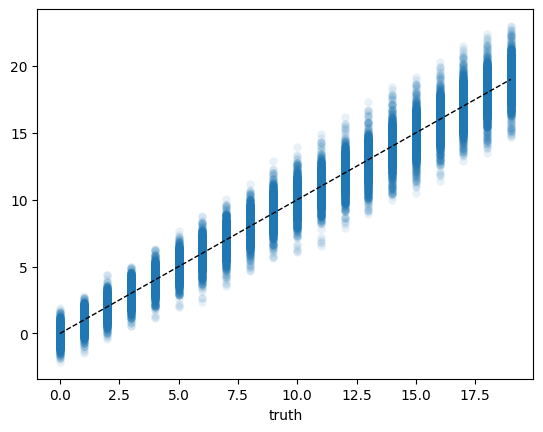

In [13]:
t = truth.reshape(-1)
m = mean.reshape(-1)
s = std.reshape(-1)
plt.scatter(t, m, alpha=0.1, lw=0)
plt.plot([t.min(), t.max()], [t.min(), t.max()], "k--", lw=1)
plt.xlabel("truth")
plt.ylabel("estimate");

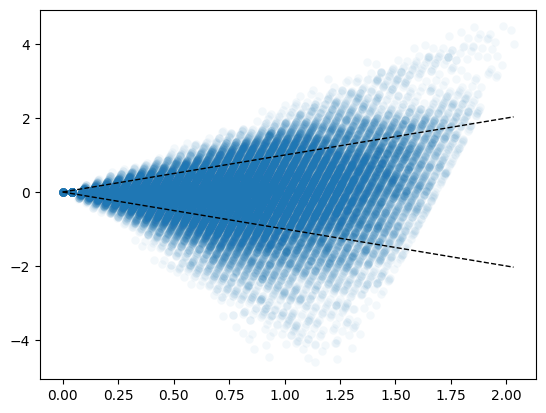

In [11]:
plt.scatter(s, m - t, alpha=0.05, lw=0)
s0, s1 = s.min(), s.max()
plt.plot([s0, s1], [s0, s1], 'k--', lw=1)
plt.plot([s0, s1], [s0, -s1], 'k--', lw=1)
plt.xlabel("predicted uncertainty")
plt.ylabel("actual err");

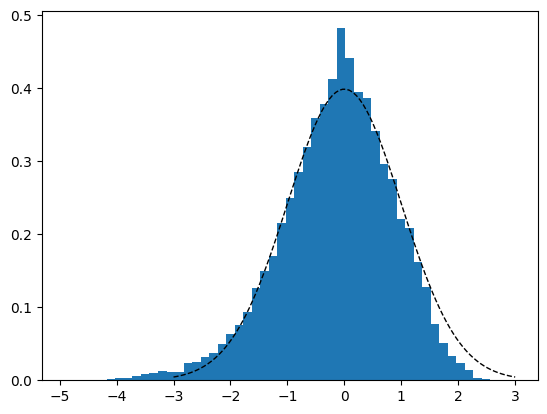

In [12]:
z = (m - t) / (s + 1e-8)
plt.hist(z.numpy(), bins=50, density=True)
X = torch.linspace(-3, 3, 100)
Y = dist.Normal(0, 1).log_prob(X).exp()
plt.plot(X, Y, 'k--', lw=1);